# Africa Economic, Banking and Systemic Crises Dataset Data Analysis

## Dataset Context
### This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at:https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx
### The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

## Dataset Content:
### The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
african_crises=pd.read_csv('african_crises.csv')
print('Dataset rows: ',african_crises.shape[0])
print('Dataset columns: ',african_crises.shape[1])
print('column names:\n',african_crises.columns)

Dataset rows:  1059
Dataset columns:  14
column names:
 Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


## Dataset Description
### case: A number which denotes a specific country
### cc3: A three letter country code
### country: The name of the country
### year: The year of the observation
### systemic_crisis: "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.
### exch_usd: The exchange rate of the country vis-a-vis the USD
### domestic_debt_in_default: "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year
### sovereign_external_debt_default: "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year
### gdp_weighted_default: The total debt in default vis-a-vis the GDP
### inflation_annual_cpi: The annual CPI Inflation rate
### independence: "0" means "no independence" and "1" means "independence"
### currency_crises: "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year
### inflation_crises: "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year
### banking_crisis: "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

In [4]:
print('Data type of each column:\n')
print(african_crises.dtypes)

Data type of each column:

case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object


In [5]:
african_crises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

# Visualisations

## Systemic Crisis
### A systemic crisis is a domino effect in which a financial trouble spreads. between institutions and markets until it affects the whole monetary. and financial system with dire global economic consequences

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

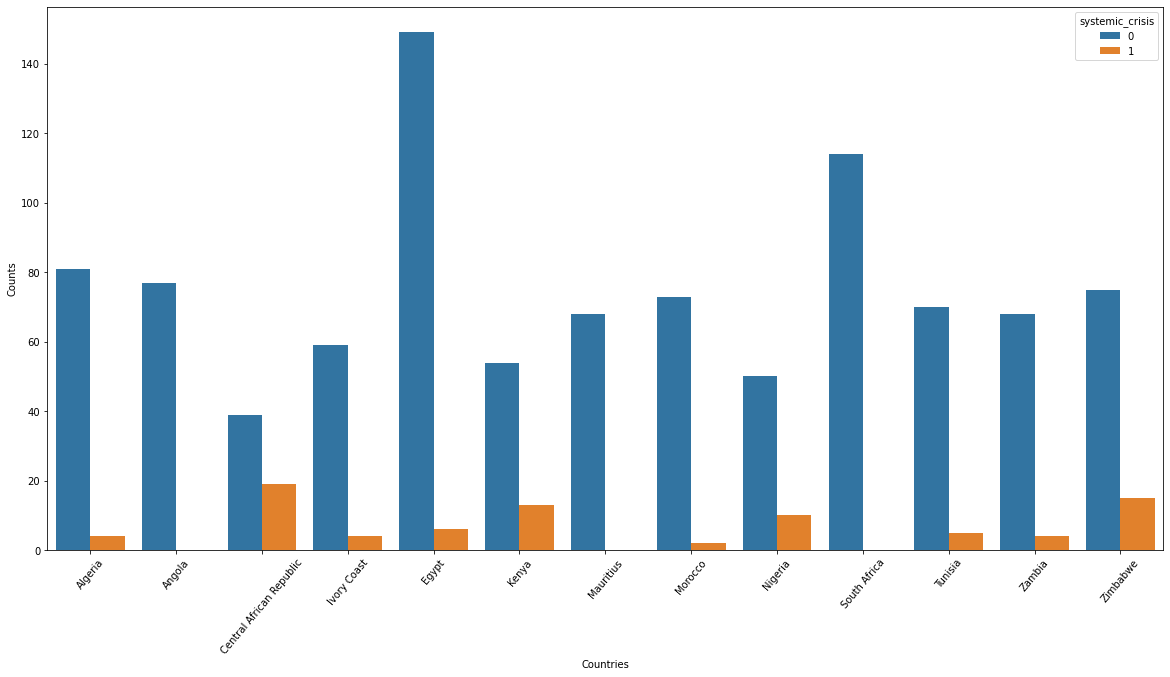

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(african_crises['country'],hue=african_crises['systemic_crisis'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

### The country that shows the highest count for systemic crisis is Central African Republic followed by Zimbabwe and Kenya. As per the definition of systemic crisis, there should be a link between systemic crisis and banking crisis. Lets check if these countries had a banking crisis at the same time.

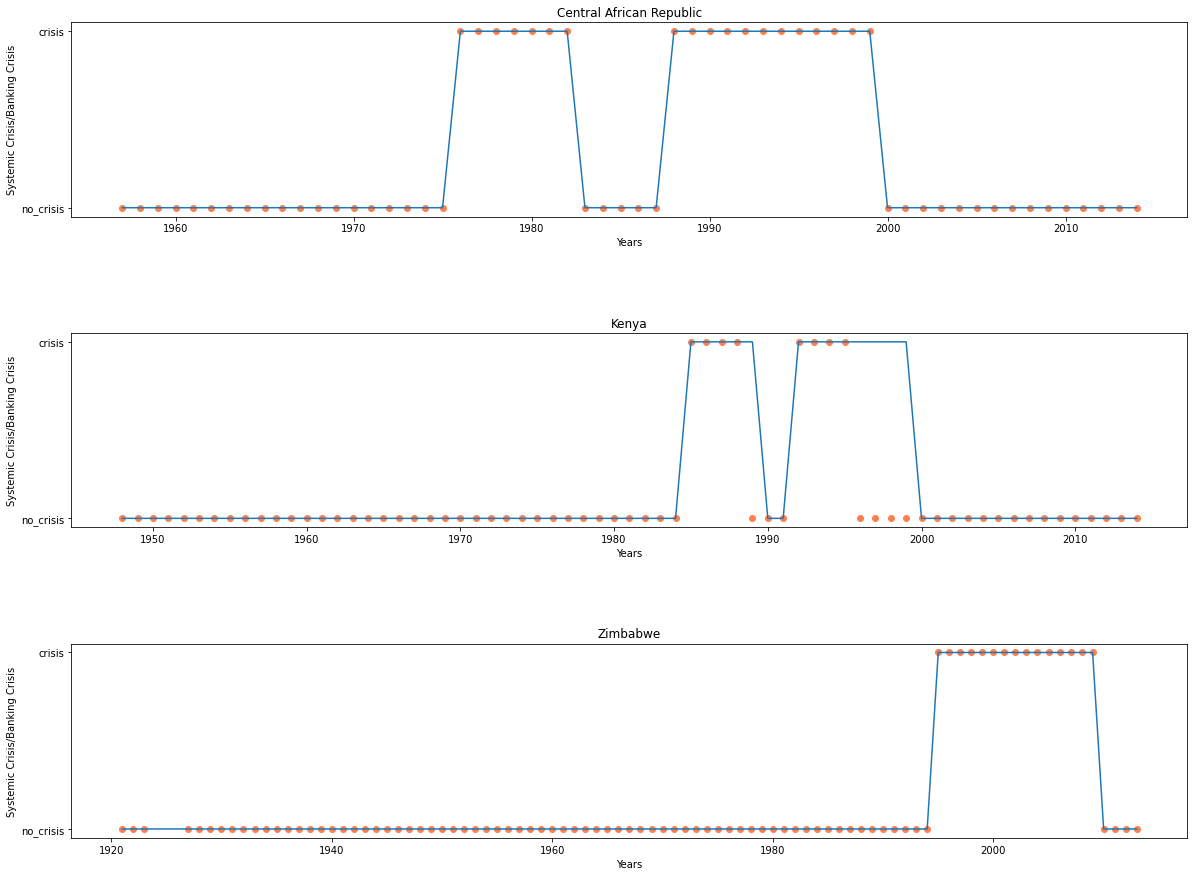

In [7]:
systemic = african_crises[['year','country', 'systemic_crisis', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country']=='Kenya') | (systemic['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()),1,count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(subset['year'],subset['systemic_crisis'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.title(country)
    count+=1

### This shows how both the crisis overlap leading to confirming that systemic crisis has an impact on banking crisis.

## Exchange Rates Over The Years
### An exchange rate is the value of one country's currency versus the currency of another country or economic zone. Let's visualize the exchange rate of the country vis-a-vis the USD

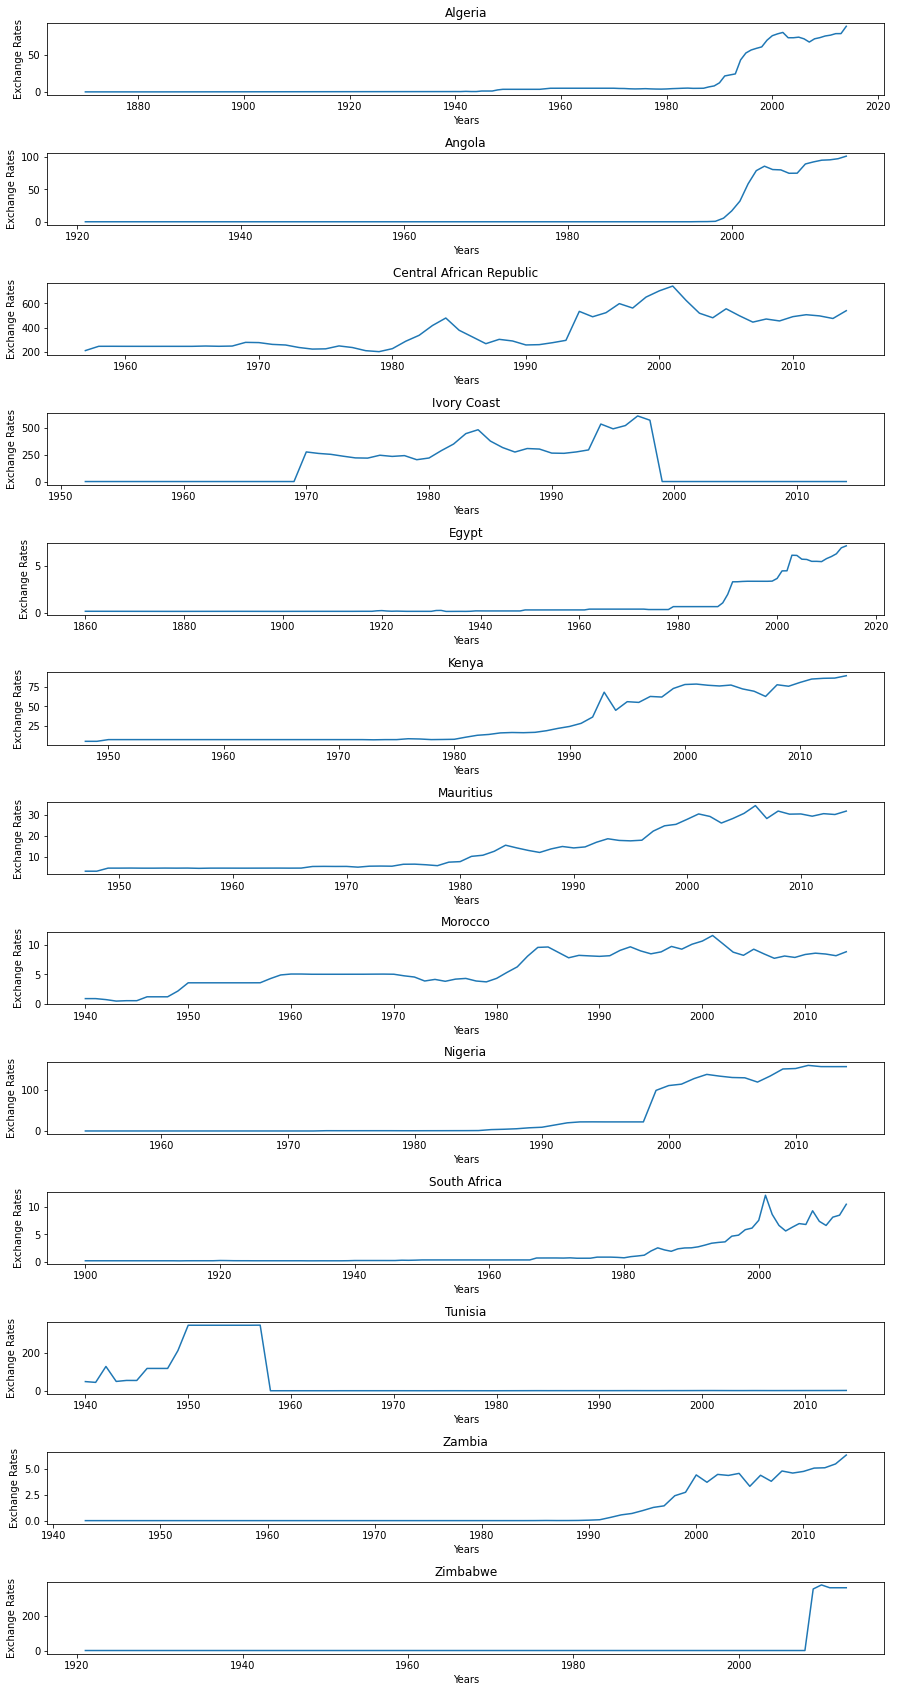

In [8]:
plt.figure(figsize=(15,30))
count = 1
for country in african_crises.country.unique():
    plt.subplot(len(african_crises.country.unique()),1,count)
    count+=1
    sns.lineplot(african_crises[african_crises.country==country]['year'],african_crises[african_crises.country==country]['exch_usd'])
    plt.subplots_adjust(hspace=0.8)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)

### We can see that most countries experienced increased exchage rates from 1990 upwards

## Sovereign Domestic Debt Default
### Sovereign debt is a central government's debt. It is debt issued by the national government in a foreign currency in order to finance the issuing country's growth and development. The stability of the issuing government can be provided by the country's sovereign credit ratings which help investors weigh risks when assessing sovereign debt investments.

## Sovereign External Debt Default¶
### External debt is the portion of a country's debt that was borrowed from foreign lenders, including commercial banks, governments, or international financial institutions. These loans, including interest, must usually be paid in the currency in which the loan was made. To earn the needed currency, the borrowing country may sell and export goods to the lender's country.

### A debt crisis can occur if a country with a weak economy is not able to repay the external debt due to the inability to produce and sell goods and make a profitable return.

### If a nation is unable or refuses to repay its external debt, it is said to be in a sovereign default. This can lead to the lenders withholding future releases of assets that might be needed by the borrowing nation. Such instances can have a rolling effect, wherein the borrower’s currency collapses and that nation’s overall economic growth is stalled.

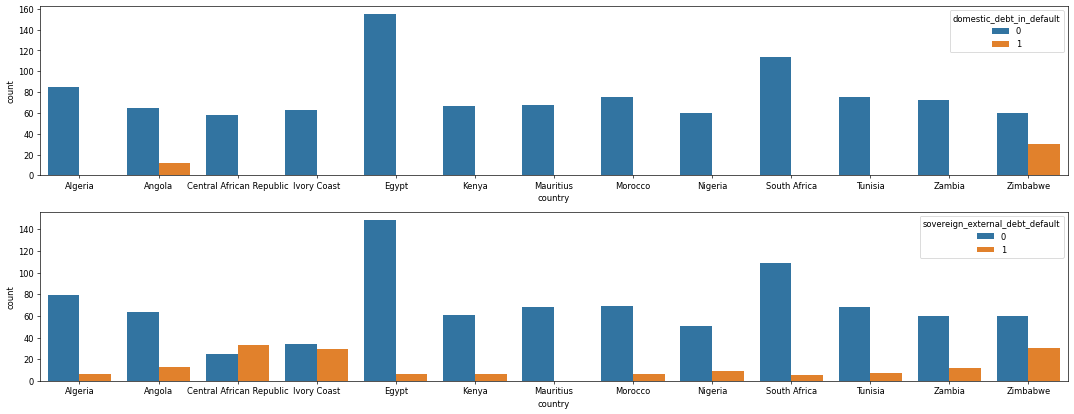

In [9]:
#Visualizing different types of debts
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(18,7), dpi= 60)
axes = axes.flatten()
cols = ['domestic_debt_in_default','sovereign_external_debt_default']
for i, ax in zip(cols, axes):
  sns.countplot(x = 'country', ax = ax, data = african_crises, hue = i)
plt.tight_layout()
display()

### We see only Angola and Zimbabwe defaulting in domestic debt. 
### We see only Central African Republic , Ivory Coast and Zimbabwe defaulting in external debt. 

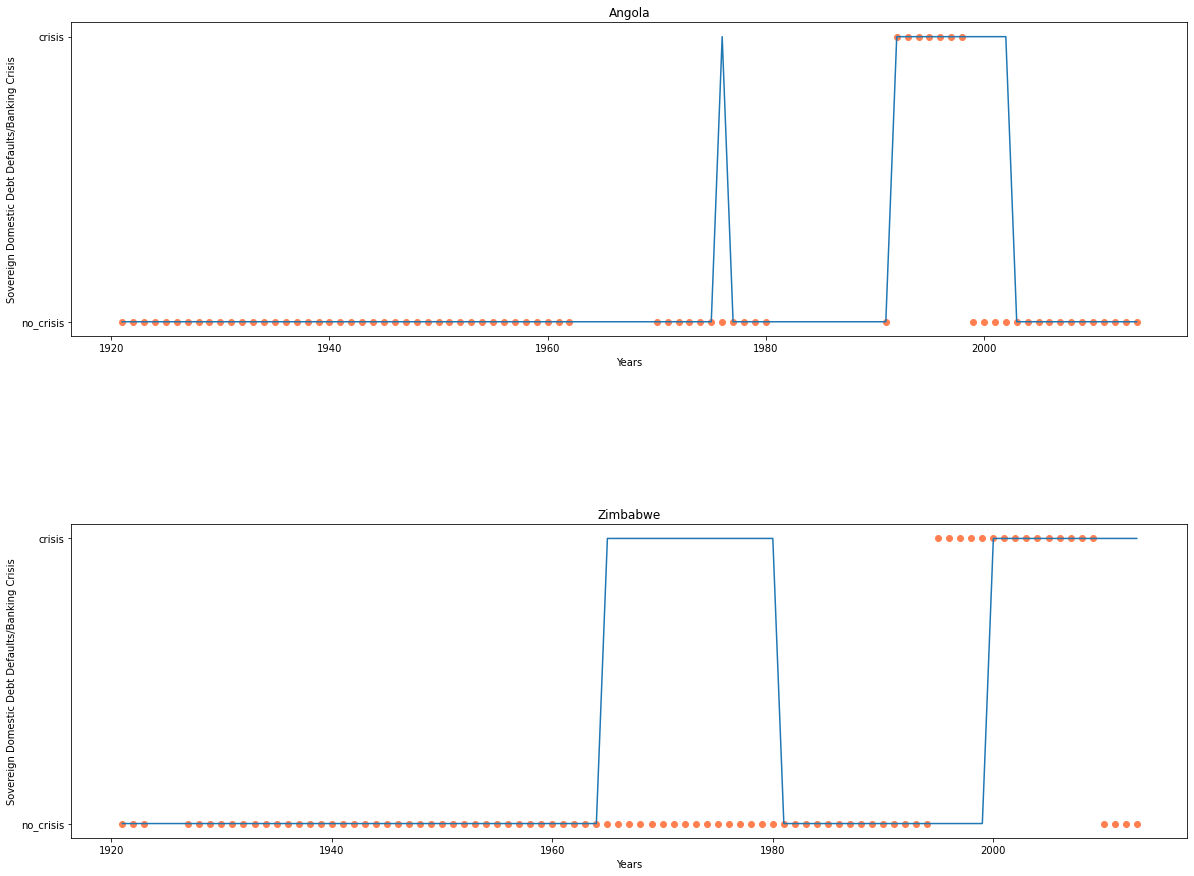

In [10]:
sovereign = african_crises[['year','country', 'domestic_debt_in_default', 'banking_crisis']]
sovereign = sovereign[(sovereign['country'] == 'Angola') | (sovereign['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in sovereign.country.unique():
    plt.subplot(len(sovereign.country.unique()),1,count)
    subset = sovereign[(sovereign['country'] == country)]
    sns.lineplot(subset['year'],subset['domestic_debt_in_default'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Domestic Debt Defaults/Banking Crisis')
    plt.title(country)
    count+=1

### This shows that during the times these two coutries faced a banking crisis, they also defaulted on the sovereign debts. For example, for Angola, somewhere around late 1970's despite not having a banking crisis, the country defaulted for domestic default but quickly came back from it. After that, it was only around the begining of 1990, we see that a banking crisis, eventually lead the country to default again. Similarly, for Zimbabwe the country was already facing a banking crisis which eventually led it to default on domestic debts.

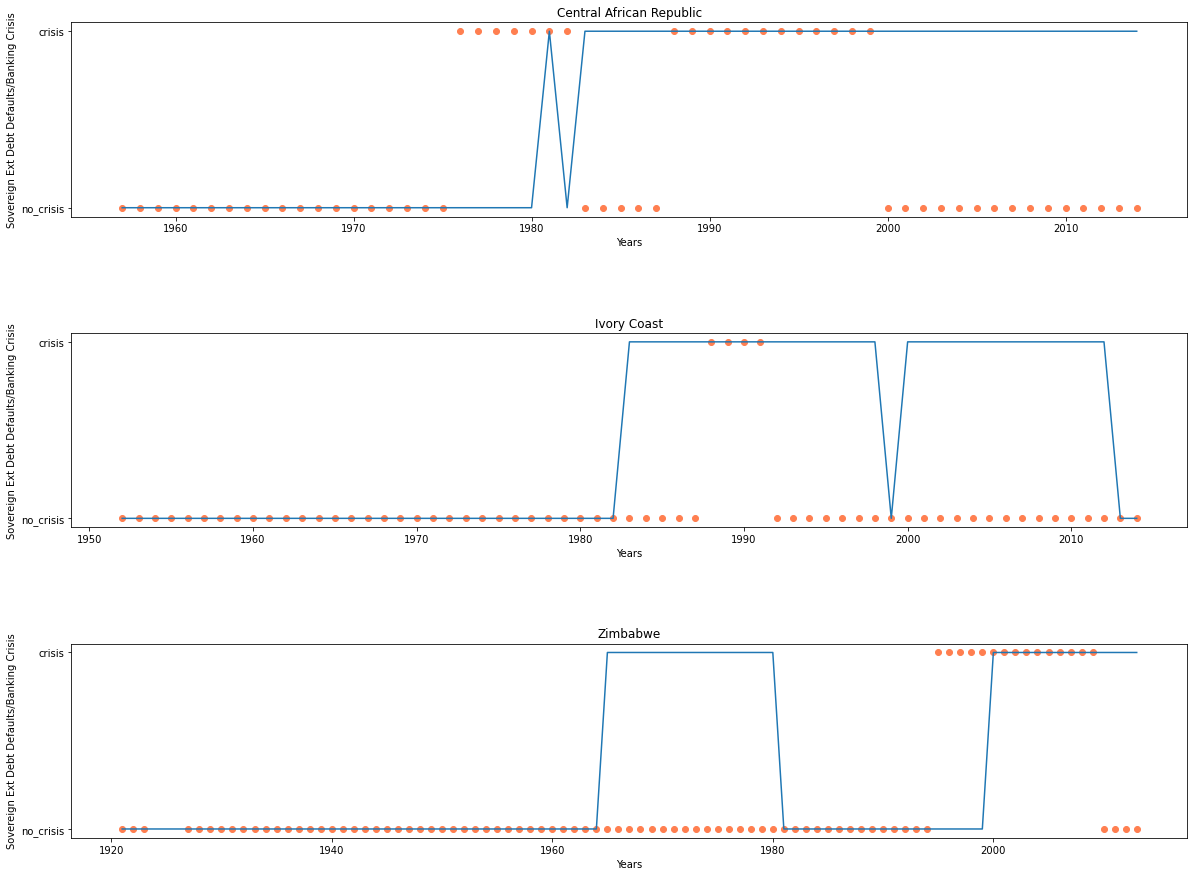

In [11]:
sovereign_ext = african_crises[['year','country', 'sovereign_external_debt_default', 'banking_crisis']]
sovereign_ext = sovereign_ext[(sovereign_ext['country'] == 'Central African Republic') | (sovereign_ext['country'] == 'Ivory Coast') | (sovereign_ext['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in sovereign_ext.country.unique():
    plt.subplot(len(sovereign_ext.country.unique()),1,count)
    subset = sovereign_ext[(sovereign_ext['country'] == country)]
    sns.lineplot(subset['year'],subset['sovereign_external_debt_default'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Ext Debt Defaults/Banking Crisis')
    plt.title(country)
    count+=1

### This shows that the three countries default on external debt, despite not having a banking crisis as a premise. Even without the banking crisis they are marked to default on external debt.

## Currency Crisis¶
### A currency crisis is a situation in which serious doubt exists as to whether a country's central bank has sufficient foreign exchange reserves to maintain the country's fixed exchange rate. The crisis is often accompanied by a speculative attack in the foreign exchange market. A currency crisis results from chronic balance of payments deficits, and thus is also called a balance of payments crisis. Often such a crisis culminates in a devaluation of the currency. Let's take a look at the countries who were reported to have faced a currency crisis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

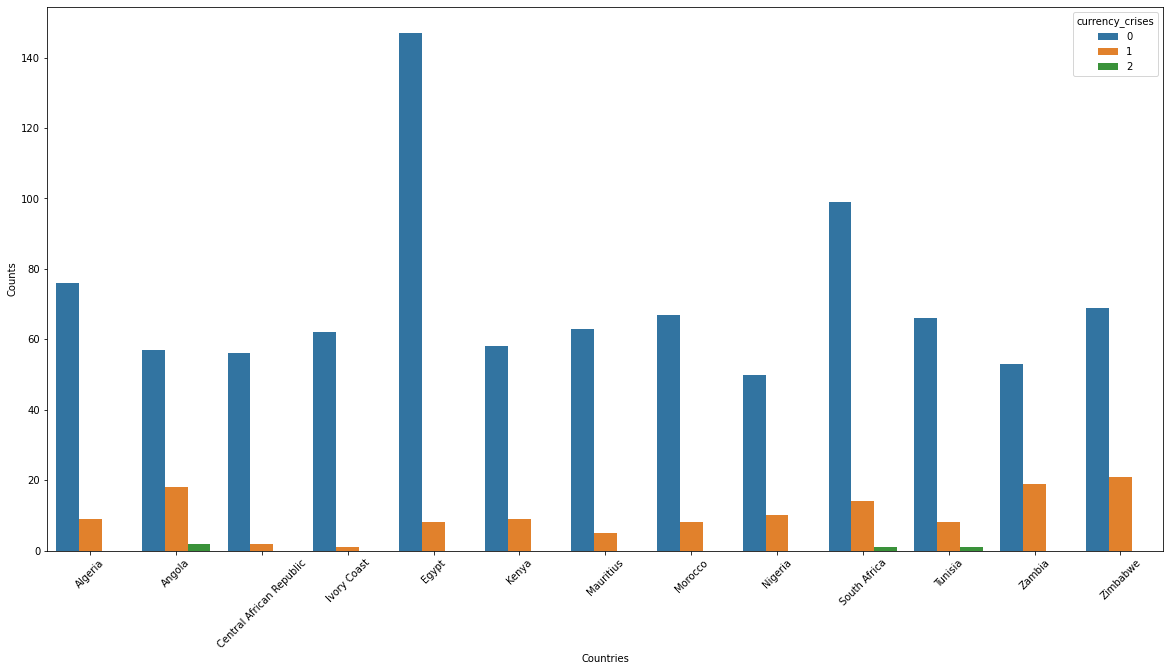

In [12]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(african_crises['country'],hue=african_crises['currency_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

### All countries experienced currency crisis with Ivory coast being the least and Angola, Zambia and Zimbabwe being the highest.

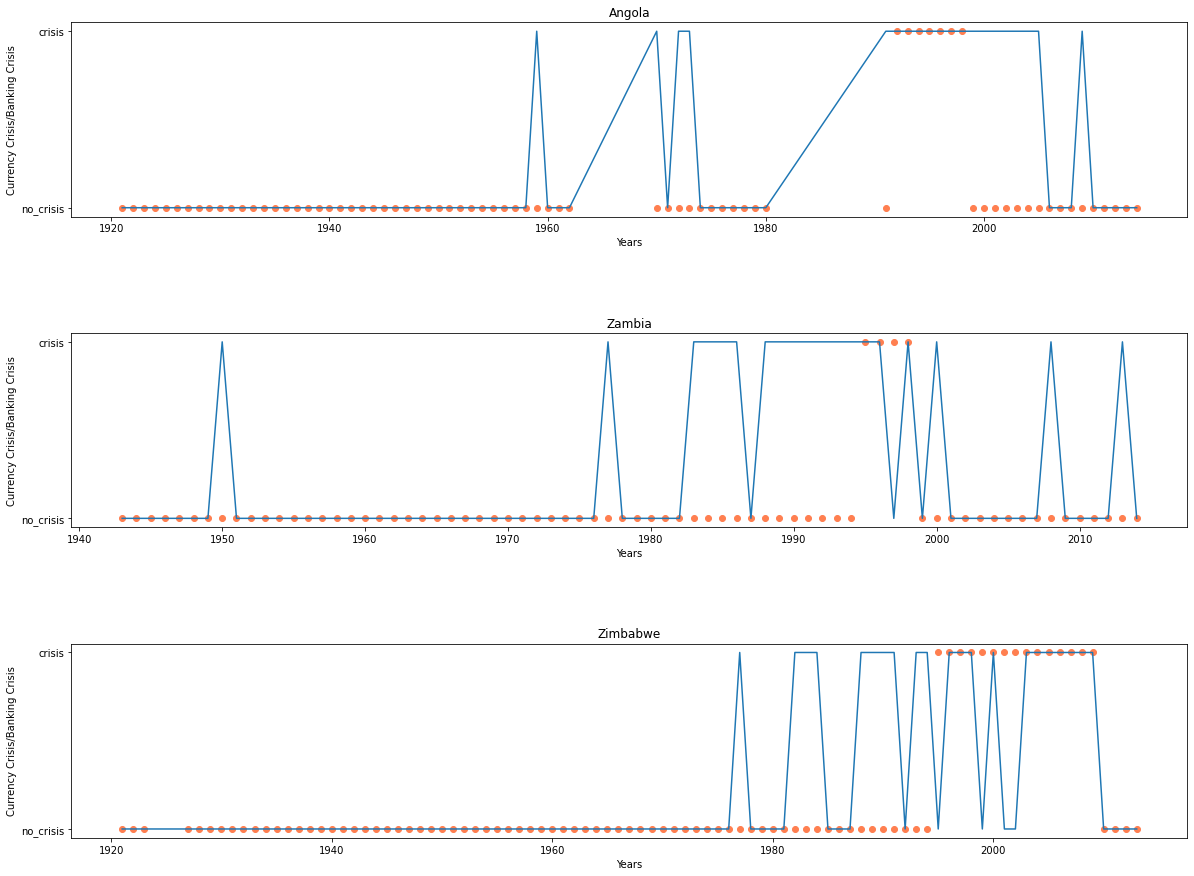

In [13]:
curr = african_crises[['year','country', 'currency_crises', 'banking_crisis']]
curr = curr[(curr['country'] == 'Angola') | (curr['country'] == 'Zambia') | (curr['country']=='Zimbabwe') ]
curr = curr.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))
count = 1

for country in curr.country.unique():
    plt.subplot(len(curr.country.unique()),1,count)
    subset = curr[(curr['country'] == country)]
    sns.lineplot(subset['year'],subset['currency_crises'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Currency Crisis/Banking Crisis')
    plt.title(country)
    count+=1


### What we see is that these countries faced fluctuating currency crisis even before they were hit with a banking crisis. For example look at Zimbabwe's currency crisis spread. This country faced a currency crisis on and off for around 10 years in total before it faced a banking crisis.

## Inflation Crisis
### Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over a period of time. It is the constant rise in the general level of prices where a unit of currency buys less than it did in prior periods.

### Let's look at the countries that were accounted for an inflation crisis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

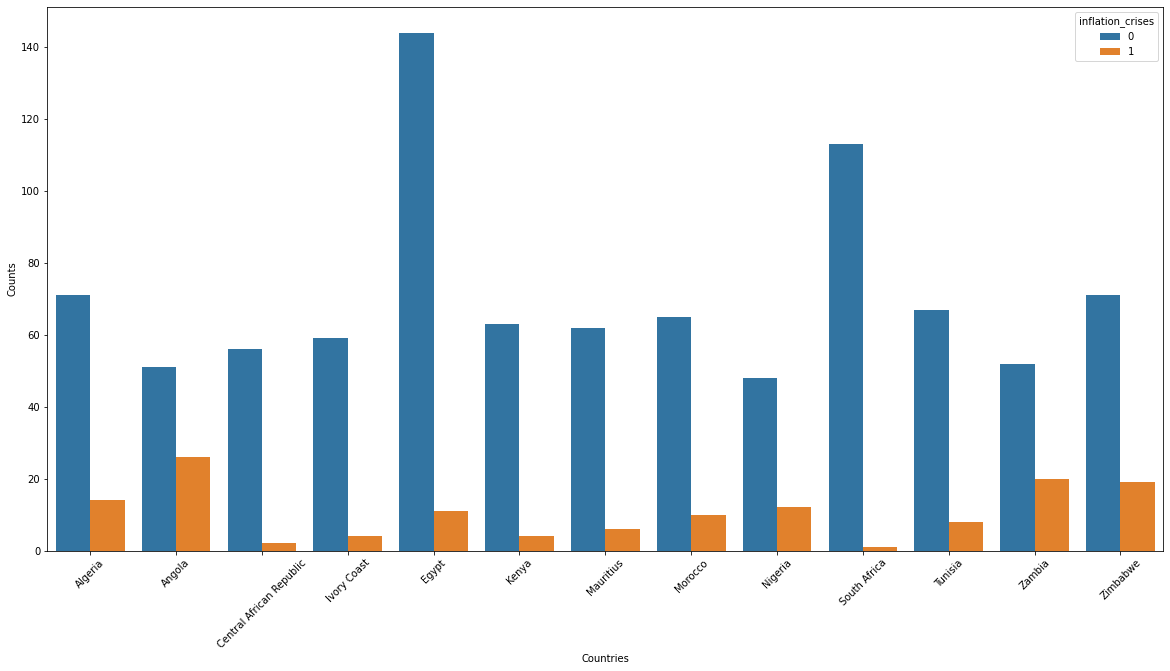

In [14]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(african_crises['country'],hue=african_crises['inflation_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

### Most commonly used inflation indexes are the Consumer Price Index (CPI). Let's look at the Annual CPI for the three countries to see if we can derive any insights.

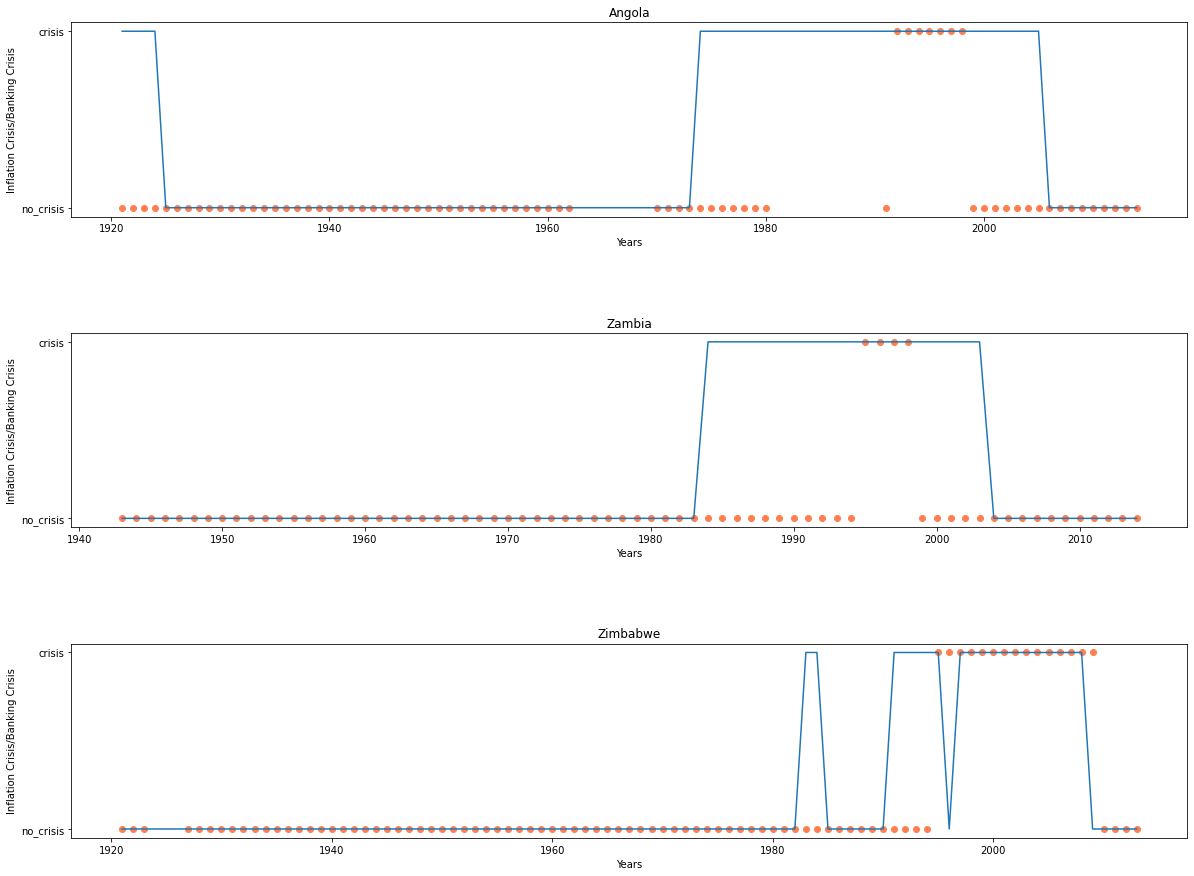

In [15]:
infla = african_crises[['year','country', 'inflation_crises', 'inflation_annual_cpi', 'banking_crisis']]
infla = infla[(infla['country'] == 'Angola') | (infla['country'] == 'Zambia') | (infla['country']=='Zimbabwe') ]
infla = infla.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()),1,count)
    subset = infla[(infla['country'] == country)]
    sns.lineplot(subset['year'],subset['inflation_crises'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Inflation Crisis/Banking Crisis')
    plt.title(country)
    count+=1

### Again, like currency crisis, we see that the countries had an inflation crisis, despite not being hit by a banking crisis. Inflation can be viewed positively or negatively depending on the individual viewpoint. Those with tangible assets, like property or stocked commodities, may like to see some inflation as that raises the value of their assets. People holding cash may not like inflation, as it erodes the value of their cash holdings. Ideally, an optimum level of inflation is required to promote spending to a certain extent instead of saving, thereby nurturing economic growth.

## Annual CPI

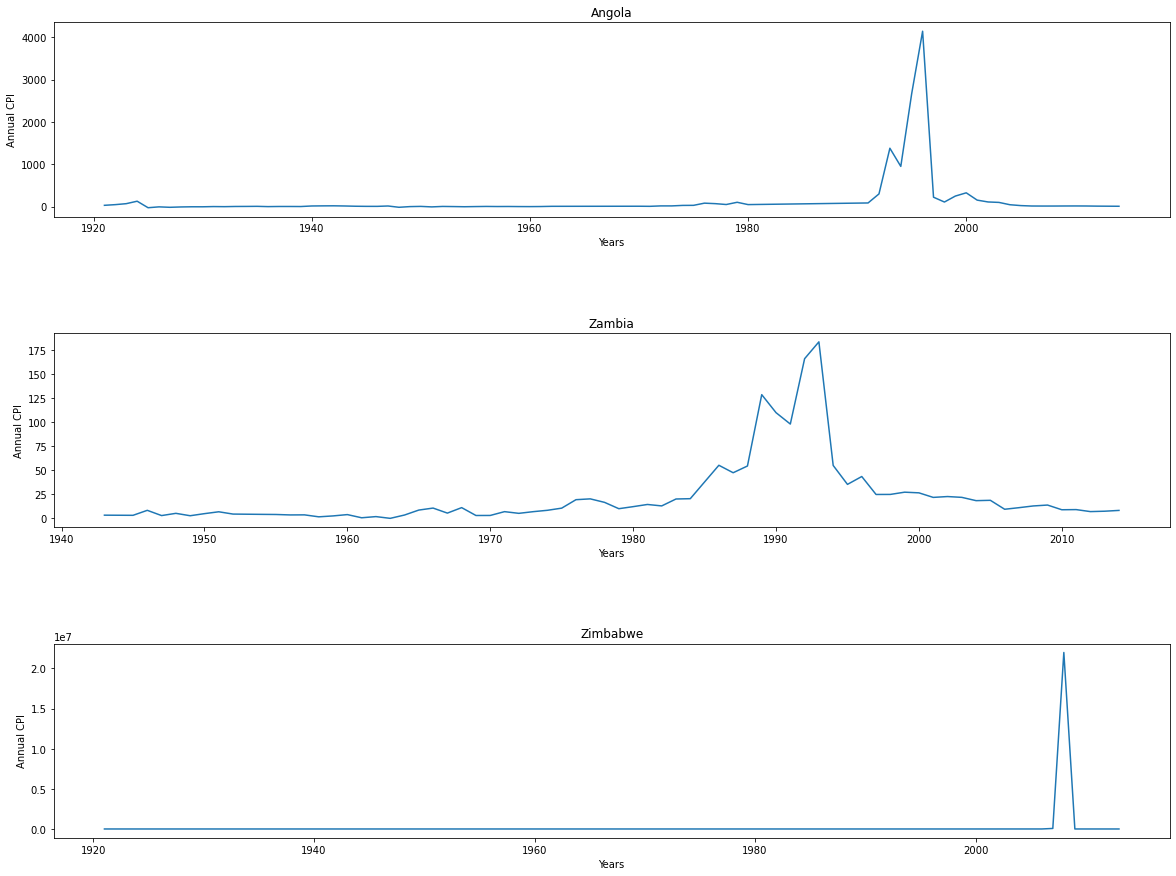

In [16]:
plt.figure(figsize=(20,15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()),1,count)
    subset = infla[(infla['country'] == country)]
    sns.lineplot(subset[subset.country==country]['year'], subset[subset.country==country]['inflation_annual_cpi'])
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Annual CPI')
    plt.title(country)
    count+=1

### We see that the rise in the annual CPI for the countries co-incide around the same time period when the country was facing a banking crisis.

# Conclusion

## 1. Central African Republic have the highest occurence of systemic crisis followed by Zimbabwe and Kenya.
## 2. Systemic crisis has impact on banking crisis. This is shown by overlapping of both crisis in visualizations above.
## 3. There was a general increase in exchange rates from 1990.
## 4. Zimbabwe defaulted both in external and domestic debt. However, this default was not dependent on if they experienced bank crisis that year.
## 5. Most countries experienced currency crisis before experiencing banking crisis
## 6. Countries had an inflation crisis despite not being hit by a banking crisis.
## 7. A rise in annual CPI co-incides with the same time as bank crisis (and systemic crisis) which usually co-incides with inflation crisis